<a href="https://colab.research.google.com/github/kaylynrmd/Predictive-Analytics-Project/blob/main/notebooks/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploratory Data Analysis (EDA)

The purpose of this notebook is to explore patterns, trends, and relationships in the Telco Customer Churn dataset.
This analysis helps identify potential drivers of churn and informs feature selection and modeling decisions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("blastchar/telco-customer-churn")
files = os.listdir(path)
files


Using Colab cache for faster access to the 'telco-customer-churn' dataset.


['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [4]:
df = pd.read_csv(os.path.join(path, files[0]))
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape


(7043, 21)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


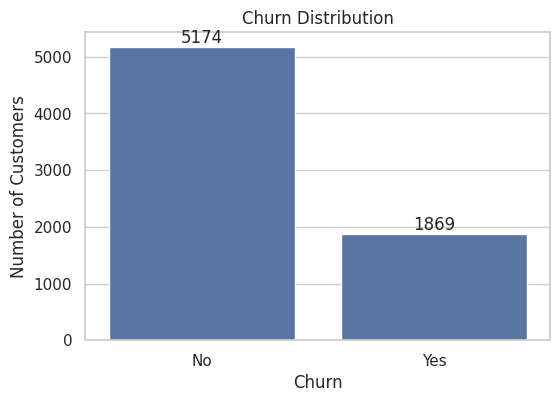

In [10]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

for container in ax.containers:
    ax.bar_label(container)

plt.show()


The dataset shows an imbalance between customers who churn and those who do not.  
While most customers remain with the company, a meaningful portion churns, making churn prediction a valuable business task.


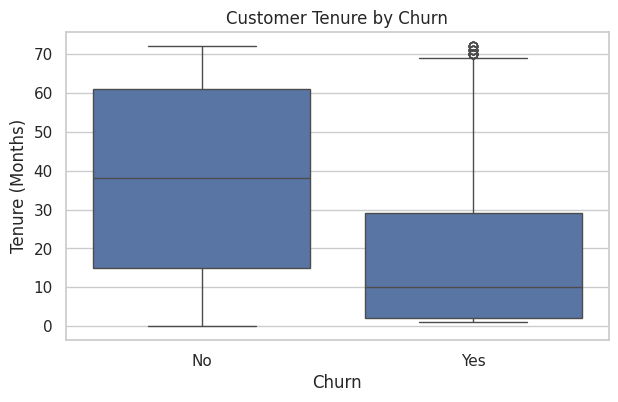

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Customer Tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


Customers who churn tend to have significantly shorter tenure than those who stay.  
This suggests that customers are most at risk of churning early in their relationship with the company.


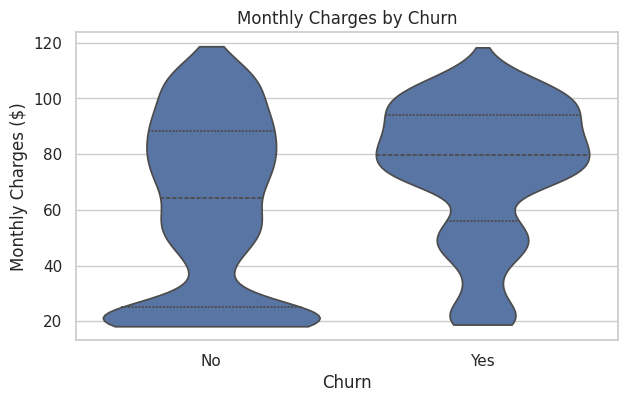

In [12]:
plt.figure(figsize=(7,4))
sns.violinplot(data=df, x="Churn", y="MonthlyCharges", inner="quartile", cut=0)
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.show()


Customers who churn generally have higher monthly charges and greater variability in billing amounts.  
This suggests that pricing and perceived value may play an important role in churn behavior.


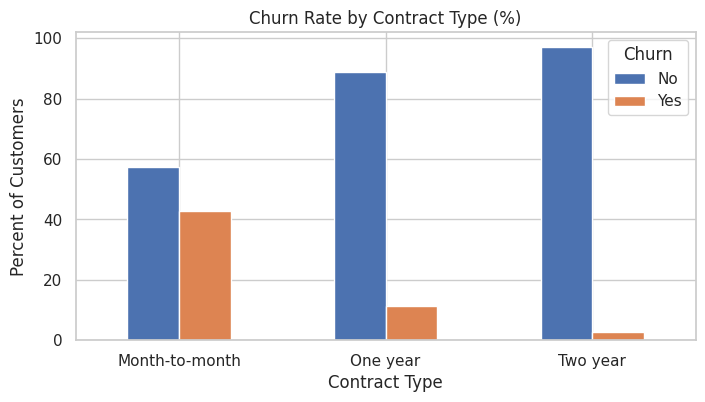

In [13]:
contract_ct = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100

contract_ct.plot(kind="bar", figsize=(8,4))
plt.title("Churn Rate by Contract Type (%)")
plt.xlabel("Contract Type")
plt.ylabel("Percent of Customers")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()


Month-to-month contracts show substantially higher churn rates compared to longer-term contracts.  
This indicates that contract length is one of the strongest predictors of customer retention.


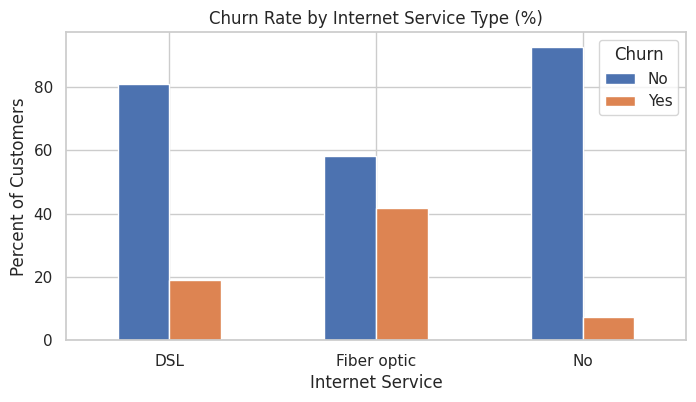

In [14]:
internet_ct = pd.crosstab(df["InternetService"], df["Churn"], normalize="index") * 100

internet_ct.plot(kind="bar", figsize=(8,4))
plt.title("Churn Rate by Internet Service Type (%)")
plt.xlabel("Internet Service")
plt.ylabel("Percent of Customers")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()


Customers using fiber optic internet have higher churn rates compared to DSL or no internet service.  
This may reflect higher costs or service quality expectations among these customers.


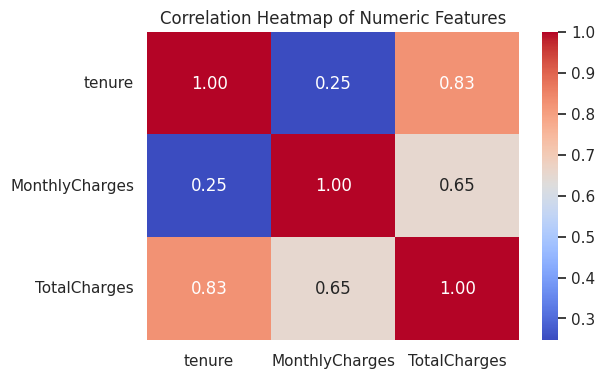

In [15]:
num_df = df[["tenure", "MonthlyCharges", "TotalCharges"]]
corr = num_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
## Key EDA Findings

- Customers with shorter tenure are significantly more likely to churn.
- Higher monthly charges are associated with increased churn.
- Month-to-month contracts have the highest churn rates.
- Internet service type, particularly fiber optic, appears to influence churn behavior.
- Tenure and total charges are strongly correlated, which is expected given billing accumulation over time.
